Met Office MOGREPS data
=============

The Met Office has made data from its world leading MOGPREPS weather model available for research purposes. In this page, we'll go over the basics of how to download the data, how you can look at it, and what it means.

Data from two models is available:

1. Mogreps UK: a high resolution weather forecast covering the UK, and
1. Mogreps G: a global weather forecast.

Amazon Web Services are kindly hosting this data for free as part of their Open Data Initiative.

## How is the data structured?
Our weather forecast models predict many weather parameters, such as air temperature, humidity or rainfall. These are predicted for every point on a regular grid, that is, as a function of latitude, longitude, and (when appropriate) altitude.

With the advent of our latest supercomputer, we now regularly run "ensemble forecasts". This means that instead of starting one model run now to predict tomorrow, we start many, purturbing the intial parameters to give several possible futures (or *realisations*). The spread of these different realisations gives an indication of the uncertainty of the forecast, and can be very powerful information.

Each forecast point also has several measures of time. Firstly, `time` indicates the real world time that the data is forecast for. Secondly, `reference_time` is the time that the forecast was started from i.e. the 0th `time` point. Finally, `forecast_period` is the difference between the two i.e. the number of hours that have elapsed since the start of the forecast.

## Downloading data
Here, we'll show you a simple way to download files using Python. The data is stored in AWS S3 buckets hosted in the eu-west-2 region, named `mogreps-uk` and `mogreps-g`. If that doesn't mean anything to you, don't worry - have a look at the Python functions below.

`make_data_object_name` takes infomation about the data you are looking for and constructs it into a data object name (you can think of this as a file name). We'll go into what things like forecast_period and realization are in a minute. `download data` then saves this object to the same directory as your notebook. 

In [1]:
import urllib.request

def make_data_object_name(dataset_name, year, month, day, hour, forecast_period, realization):
    template_string = "prods_op_{}_{:02d}{:02d}{:02d}_{:02d}_{:02d}_{:03d}.nc"
    return template_string.format(dataset_name, year, month, day, hour, forecast_period, realization)

def download_data_object(dataset_name, data_object_name):
    url = "https://s3.eu-west-2.amazonaws.com/" + dataset_name + "/" + data_object_name
    urllib.request.urlretrieve(url, data_object_name) # save in this directory with same name

Note that you can also use Python modules such as Boto to list, filter and retrieve these files.

We'll use these functions to download one data object.

In [2]:
obj_name = make_data_object_name('mogreps-uk', 2013, 1, 1, 3, 0, 3)
download_data_object('mogreps-uk', obj_name)

and here is is.

In [3]:
!ls -ltrh {obj_name}

-rw-r--r-- 1 root root 23M Jun 16 15:14 prods_op_mogreps-uk_20130101_03_00_003.nc


## Loading Data

This data is in NetCDF format, which is a type of the widely used HDF format. You can use any compatible tools, but we recommend the Met Office's Iris Python module. First of all, let's make sure we've got Iris instaled using Conda.

In [4]:
!conda install -y -c scitools iris

Fetching package metadata ...........
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /opt/conda:
#
iris                      1.10.dev1                py35_0    scitools


Now let's load the file we just downloaded

In [5]:
import iris
mydata = iris.load("./prods_op_mogreps-uk_20130101_03_00_003.nc")

print(mydata)

/opt/conda/lib/python3.5/site-packages/iris/fileformats/cf.py:1140: IrisDeprecation: NetCDF default loading behaviour currently does not expose variables which define reference surfaces for dimensionless vertical coordinates as independent Cubes. This behaviour is deprecated in favour of automatic promotion to Cubes. To switch to the new behaviour, set iris.FUTURE.netcdf_promote to True.
  warn_deprecated(msg)


0: cloud_base_altitude_assuming_only_consider_cloud_area_fraction_greater_than_2p5_oktas / (kft) (time: 4; grid_latitude: 548; grid_longitude: 421)
1: wet_bulb_potential_temperature / (K) (time: 4; pressure: 3; grid_latitude: 548; grid_longitude: 421)
2: cloud_area_fraction_assuming_maximum_random_overlap / (1) (time: 4; grid_latitude: 548; grid_longitude: 421)
3: wet_bulb_freezing_level_altitude / (m) (time: 3; grid_latitude: 548; grid_longitude: 421)
4: stratiform_snowfall_rate / (kg m-2 s-1) (time: 36; grid_latitude: 548; grid_longitude: 421)
5: air_pressure_at_sea_level / (Pa)    (time: 4; grid_latitude: 548; grid_longitude: 421)
6: air_temperature / (K)               (time: 4; grid_latitude: 548; grid_longitude: 421)
7: air_temperature / (K)               (time: 4; pressure: 2; grid_latitude: 548; grid_longitude: 421)
8: air_temperature / (K)               (time: 3; grid_latitude: 548; grid_longitude: 421)
9: air_temperature / (K)               (time: 3; grid_latitude: 548; grid_l

You can see here that the object we have loaded from our file contains many different meteorological perameters.

We can find our more information about a particuarl parameter...

In [6]:
surface_temp = mydata[8]
print(surface_temp)

air_temperature / (K)               (time: 3; grid_latitude: 548; grid_longitude: 421)
     Dimension coordinates:
          time                           x                 -                    -
          grid_latitude                  -                 x                    -
          grid_longitude                 -                 -                    x
     Auxiliary coordinates:
          forecast_period                x                 -                    -
     Scalar coordinates:
          forecast_reference_time: 2013-01-01 03:00:00
          height: 1.5 m
     Attributes:
          Conventions: CF-1.5
          STASH: m01s03i236
          source: Data from Met Office Unified Model
          um_version: 7.9
     Cell methods:
          maximum: time_3 (1 hour)


...access the underlying data...

In [7]:
surface_temp.data

array([[[ 284.25 ,  284.25 ,  284.25 , ...,  281.   ,  281.125,  281.   ],
        [ 284.25 ,  284.25 ,  284.25 , ...,  281.125,  281.125,  281.   ],
        [ 284.25 ,  284.25 ,  284.25 , ...,  281.125,  281.   ,  281.   ],
        ..., 
        [ 281.125,  281.125,  281.125, ...,  279.25 ,  279.25 ,  279.25 ],
        [ 281.125,  281.125,  281.125, ...,  279.25 ,  279.25 ,  279.25 ],
        [ 281.125,  281.125,  281.125, ...,  279.25 ,  279.25 ,  279.25 ]],

       [[ 284.375,  284.375,  284.375, ...,  281.125,  281.125,  281.125],
        [ 284.375,  284.375,  284.375, ...,  281.125,  281.125,  281.   ],
        [ 284.375,  284.375,  284.375, ...,  281.25 ,  281.125,  281.   ],
        ..., 
        [ 281.125,  281.125,  281.125, ...,  279.125,  279.125,  279.125],
        [ 281.125,  281.125,  281.125, ...,  279.125,  279.125,  279.125],
        [ 281.125,  281.125,  281.125, ...,  279.125,  279.125,  279.125]],

       [[ 284.375,  284.375,  284.375, ...,  281.25 ,  281.375,  281

...and make plots.

/opt/conda/lib/python3.5/site-packages/iris/coords.py:802: UserWarning: Coordinate 'grid_longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
/opt/conda/lib/python3.5/site-packages/iris/coords.py:802: UserWarning: Coordinate 'grid_latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


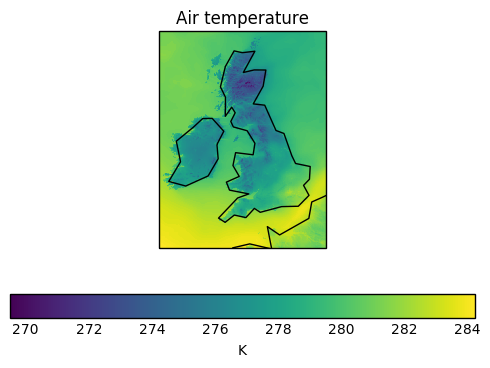

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import iris.quickplot as qplt

time_slice = surface_temp[0]
qplt.pcolormesh(time_slice, cmap='viridis')
plt.gca().coastlines()

## Finally...

We hope you found this page a useful introduction. Please have a look at the data page, where you can find other notebooks covering more advance uses. In particular the Met Office Informatics Lab are working on distributed cloud computing using Iris and Dask.

This data is free to use for research purposes only, and not for profit making applications. Any derived products should acknowledge the use of Met Office data. No ongoing level of support is implied and data may be changed or removed without notice.